In [1]:
#This is the qfuncts

import numpy as np
from numpy import identity as eye, trace, kron

#### error builder functions, for the matrix checks
#Defining recursivly
#This is how you choose your protecton
def kron_eye(n):
    I = eye(2)
    tI = I.copy()
    for i in range(n-1):
        I = kron(I, tI)
    return(I)
def eX(n):
    x = np.array([[0, 1],[1, 0]])
    tx = np.array(x, copy=True)
    for i in range(n-1):
        x = kron(x, tx)
    return(x)
def eY(n):
    y = np.array([[0, -1j], [1j, 0]])
    ty = np.array(y, copy=True)
    for i in range(n-1):
        y = kron(y, ty)
    return(y)
def eZ(n):
    z = np.array([[1, 0], [0, -1]])
    tz = np.array(z, copy=True)
    for i in range(n-1):
        z = kron(z, tz)
    return(z)


#### encoding functions for matrix checks
def Error(A, E):
    return(np.dot(np.dot(E, A), E)) # E.T gives - for Ys
def encode(P, A):
    return(np.dot(np.dot(P, A), P.T))
def decode(P, B):
    return(np.dot(np.dot(P.T, B), P))


#### retrieve rho
def partial_trace(A):
    """ only does trace 1 for now """
    n, m = A.shape
    if n != m:
        print("squares for now")
        return(1)
    a = A[:n//2, :n//2]
    #b = A[:n//2, n//2:]
    #c = A[n//2:, :n//2]
    d = A[n//2:, n//2:]
    if np.log2(n) % 2 == 1: # if odd
        return(np.add(a, d))
    else: # two sigmas need getting rid
        return(partial_trace(np.add(a, d)))
    
    
#### floating point cleanup
def round_error(A, B):
    total = np.sum(A - B)
    return(np.abs(total) < 0.001)


#### recursively build teh circuit
def build_circ(qc, q, E):
    
    n = q[-1][1] + 1# highest qubit
    def err(e, base=False):
        d = {'X':qc.x, 'Y':qc.y, 'Z':qc.z, 'I':lambda x: None}
        d[e](q[n-1])
        if base: # if we're at q3
            d[e](q[0])
            d[e](q[1])
    
    if n % 2 == 0: # qn is even
        qc.cx(q[n-2], q[n-1])
        qc.h(q[n-2])
        qc.cx(q[n-2], q[n-1])
        build_circ(qc, q[:-1], E)
        err(E)
        qc.cx(q[n-2], q[n-1])
        qc.h(q[n-2])
        qc.cx(q[n-2], q[n-1])
    else: # it's odd
        qc.cx(q[n-1], q[n-2])
        qc.cx(q[n-3], q[n-1])
        qc.cx(q[n-2], q[n-3])
        if n == 3: # base case
            err(E, True)
        else:
            build_circ(qc, q[:-1], E)
            err(E)
        qc.cx(q[n-2], q[n-3])
        qc.cx(q[n-3], q[n-1])
        qc.cx(q[n-1], q[n-2])
    return()


#### recursively build the P matrix
def build_u(N):
    if N == 2:
        return(np.array([[ 1, 0, 0, 1],
                      [ 0,-1, 1, 0],
                      [ 0, 1, 1, 0],
                      [ 1, 0, 0,-1]])/np.sqrt(2))
    elif N == 3:
        return(np.array([[1, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 0, 1],
                       [0, 0, 0, 0, 0, 1, 0, 0],
                       [0, 0, 1, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 0, 0, 1, 0],
                       [0, 1, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 1, 0, 0, 0, 0],
                       [0, 0, 0, 0, 1, 0, 0, 0]]))
    elif N % 2 == 0:
        return(np.dot(kron(eye(2), build_u(N-1)), kron(build_u(2), kron_eye(N-2))))
    else:
        return(np.dot(kron(kron_eye(2), build_u(N-2)), kron(build_u(3), kron_eye(N-3))))

In [2]:
from qiskit import *

In [3]:
import qiskit 
from qiskit import IBMQ
IBMQ.save_account('952149f0ef99e66a51ac8a059903e1031905daa1c1027e3e92aef43518bc41f6468fb2a60787910dd7193dd23d74dbff806b0bd2b85ce4791ffc92144e306ff7', overwrite=True)

In [4]:
#Imports that work.  Assuming everything else has been ported to Qiskit Standard
from numpy import identity as eye, trace, kron
import numpy as np

import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, \
    BasicAer, execute, IBMQ, __qiskit_version__

from qiskit.providers.aer import noise

from qiskit.quantum_info import Pauli, state_fidelity, basis_state, \
    process_fidelity, random_state, projector

from qiskit.tools.visualization import plot_histogram

import glob
import PIL 

In [5]:
#Simulators
statevec = BasicAer.get_backend('statevector_simulator')
unitary = BasicAer.get_backend('unitary_simulator')
qasm = BasicAer.get_backend('qasm_simulator')

In [6]:
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q')

In [7]:
#Setting up Acutal quantum Backends.  Missing ibmqx4.  


try:
    ibmqx2 = provider.get_backend('ibmqx2')
except:
    IBMQ.load_account()
    ibmqx2 = provider.get_backend('ibmqx2')

In [ ]:
#3-Cubit system with Z error

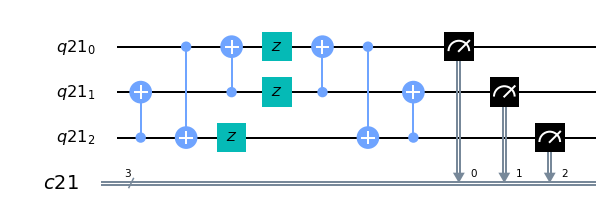

In [63]:
#Setup Quantum System
q3 = QuantumRegister(3)
c3 = ClassicalRegister(3)
qc3 = QuantumCircuit(q3, c3)

#I think that this is encoding everything using hadimar and control x gates

# encode
qc3.cx(q3[2],q3[1])
qc3.cx(q3[0], q3[2])
qc3.cx(q3[1], q3[0])
qc3.z(q3)
qc3.cx(q3[1],q3[0])
qc3.cx(q3[0], q3[2])
qc3.cx(q3[2],q3[1])
qc3.measure(q3, c3)
qc3.draw()
qc3.draw(output="mpl")

In [48]:
#Simulate using Aer
simulator = Aer.get_backend('qasm_simulator')

In [49]:
result = execute(qc3, backend=simulator).result()

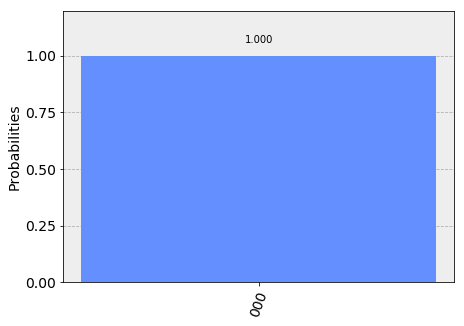

In [50]:
#Plot the result
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(qc3))

In [8]:
#Run it on a real backend

num_qubits = 3

from qiskit.providers.ibmq import least_busy #Select the least busy device
from qiskit.tools.monitor import job_monitor
possible_devices = provider.backends(filters=lambda x: 
                                     x.configuration().n_qubits >= num_qubits
                                       and 
                                     x.configuration().simulator == False)
qcomp = least_busy(possible_devices)
print(qcomp)

ibmq_16_melbourne


In [89]:
job = execute(qc3, backend=qcomp)
job_monitor(job)

NameError: name 'ibmq_16_melbourne' is not defined

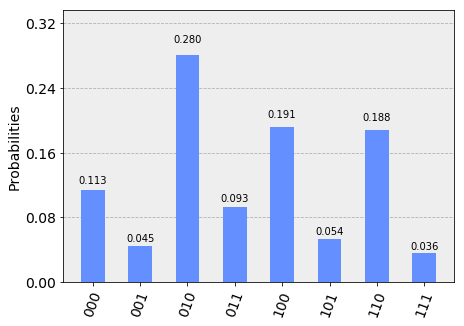

In [62]:
#Result from: ibmq_16_melbourne

result = job.result()
plot_histogram(result.get_counts(qc3))

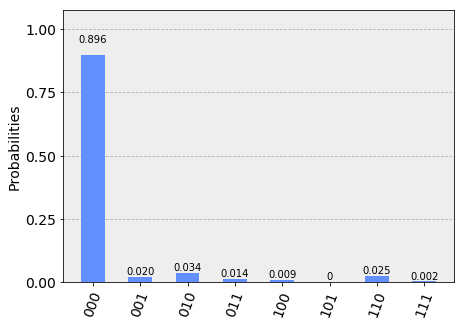

In [69]:
#Result from: ibmq_ourense

result = job.result()
plot_histogram(result.get_counts(qc3))

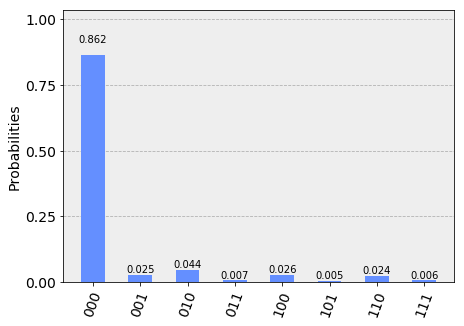

In [73]:
#Result from: ibmq_ourense (2nd time)

result = job.result()
plot_histogram(result.get_counts(qc3))

In [9]:
#3-Cubit system with Y error

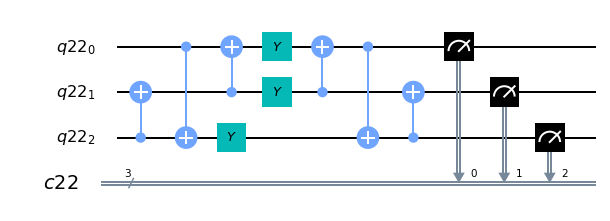

In [94]:
#Y-error: 

q3_y = QuantumRegister(3)
c3_y = ClassicalRegister(3)
qc3_y = QuantumCircuit(q3, c3)

#I think that this is encoding everything using hadimar and control x gates

# encode
qc3_y.cx(q3[2],q3[1])
qc3_y.cx(q3[0], q3[2])
qc3_y.cx(q3[1], q3[0])
qc3_y.y(q3)
qc3_y.cx(q3[1],q3[0])
qc3_y.cx(q3[0], q3[2])
qc3_y.cx(q3[2],q3[1])
qc3_y.measure(q3, c3)
qc3_y.draw()
qc3_y.draw(output="mpl")

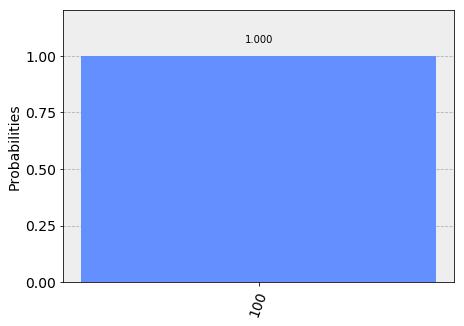

In [95]:
#Simulate using Aer
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc3, backend=simulator).result()
#Plot the result
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(qc3))

In [97]:
job = execute(qc3_y, backend=qcomp)
job_monitor(job)

Job Status: job has successfully run


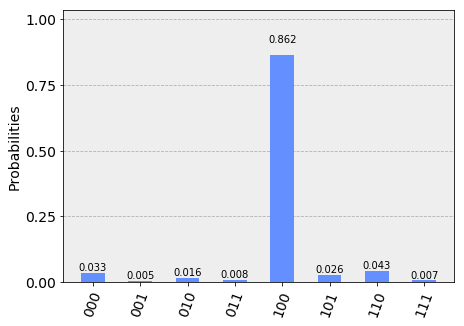

In [99]:
#Result from: ibmq_ourense, with y error 

result = job.result()
plot_histogram(result.get_counts(qc3_y))

In [10]:
#3-Cubit system with X error

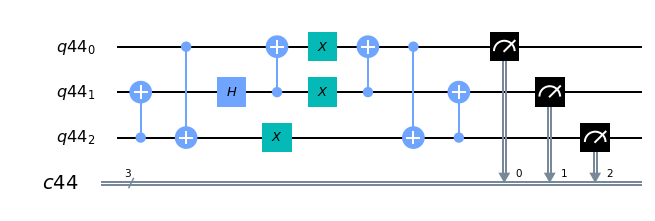

In [127]:
#X-error: 

q3_x = QuantumRegister(3)
c3_x = ClassicalRegister(3)
qc3_x = QuantumCircuit(q3_x, c3_x)

#I think that this is encoding everything using hadimar and control x gates

# encode
qc3_x.cx(q3_x[2],q3_x[1])
qc3_x.cx(q3_x[0], q3_x[2])
qc3_x.cx(q3_x[1], q3_x[0])
qc3_x.x(q3_x)
qc3_x.cx(q3_x[1],q3_x[0])
qc3_x.cx(q3_x[0], q3_x[2])
qc3_x.cx(q3_x[2],q3_x[1])
qc3_x.measure(q3_x, c3_x)
qc3_x.draw()
qc3_x.draw(output="mpl")

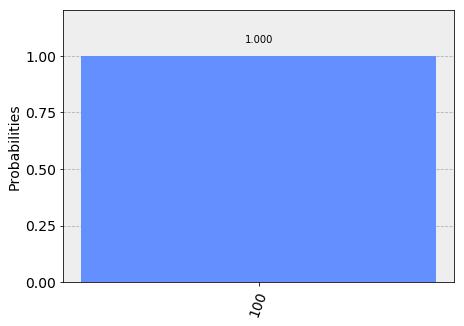

In [106]:
#Simulate using Aer
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc3_x, backend=simulator).result()
#Plot the result
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts(qc3_x))

In [102]:
job = execute(qc3_x, backend=qcomp)
job_monitor(job)

Job Status: job has successfully run


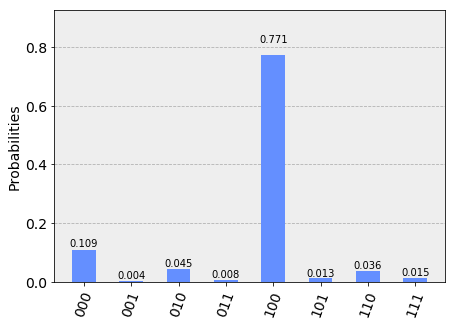

In [103]:
#Result from: ibmq_ourense, with y error 

result = job.result()
plot_histogram(result.get_counts(qc3_x))